In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

image = cv2.imread('1-Rose.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)


Highpass Filter


(-0.5, 224.5, 224.5, -0.5)

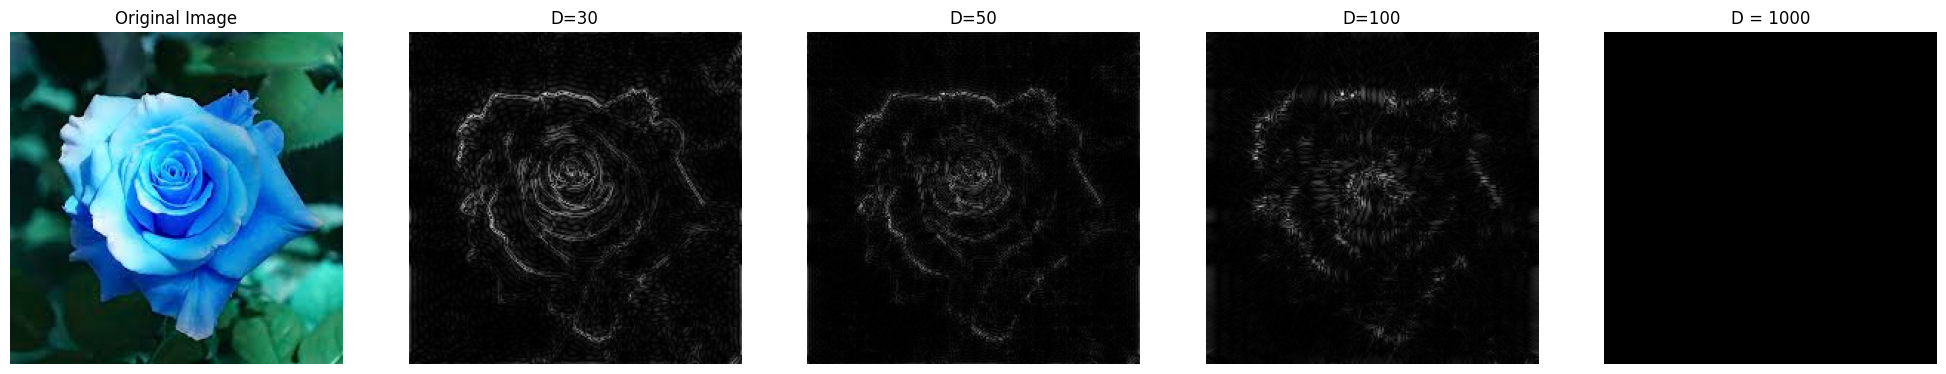

In [2]:
# Michael Putra Handidjaja_C14210184

def high_pass_filter(rows, cols, cut_off):

    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.ones((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 0
    return mask

def inverse_image(image):
    f_ishift = np.fft.ifftshift(image)
    image_back_filter = np.fft.ifft2(f_ishift)
    image_back_filter = np.abs(image_back_filter)

    return image_back_filter

height, width, channel = image.shape
f = np.fft.fft2(gray)

fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

hpf_mask_30 = fshift * high_pass_filter(width, height, 30)
hpf_mask_30 = inverse_image(hpf_mask_30)
hpf_mask_50 = fshift * high_pass_filter(width, height, 50)
hpf_mask_50 = inverse_image(hpf_mask_50)
hpf_mask_100 = fshift * high_pass_filter(width, height, 100)
hpf_mask_100 = inverse_image(hpf_mask_100)
hpf_mask_1000 = fshift * high_pass_filter(width, height, 1000)
hpf_mask_1000 = inverse_image(hpf_mask_1000)

print("Highpass Filter")
plt.figure(figsize=(30,30))

plt.subplot(1,6,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(hpf_mask_30,cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(1,6,3)
plt.imshow(hpf_mask_50,cmap='gray')
plt.title('D=50')
plt.axis('off')

plt.subplot(1,6,4)
plt.imshow(hpf_mask_100,cmap='gray')
plt.title('D=100')
plt.axis('off')

plt.subplot(1,6,5)
plt.imshow(hpf_mask_1000,cmap='gray')
plt.title('D = 1000')
plt.axis('off')

Lowpass Filter


(-0.5, 224.5, 224.5, -0.5)

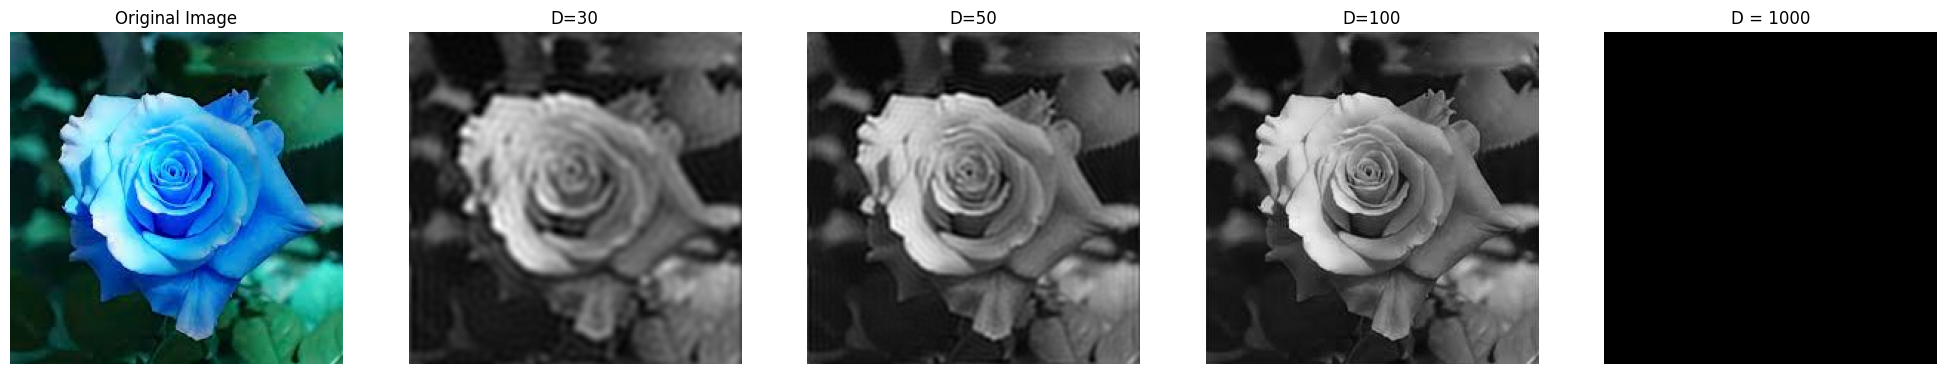

In [3]:
# Michael Putra Handidjaja_C14210184
def low_pass_filter(rows, cols, cut_off):

    crow, ccol = rows // 2, cols // 2
    x,y = np.ogrid[:rows, :cols]
    mask = np.zeros((rows, cols), np.float32)
    mask_area = (x-crow)**2 + (y-ccol)**2 <= cut_off**2
    mask[mask_area] = 1
    return mask    

lpf_mask_30 = fshift * low_pass_filter(width, height, 30)
lpf_mask_30 = inverse_image(lpf_mask_30)
lpf_mask_50 = fshift * low_pass_filter(width, height, 50)
lpf_mask_50 = inverse_image(lpf_mask_50)
lpf_mask_100 = fshift * low_pass_filter(width, height, 100)
lpf_mask_100 = inverse_image(lpf_mask_100)
lpf_mask_1000 = fshift * high_pass_filter(width, height, 1000)
lpf_mask_1000 = inverse_image(lpf_mask_1000)

print("Lowpass Filter")
plt.figure(figsize=(30,30))

plt.subplot(1,6,1)
plt.imshow(image,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(lpf_mask_30,cmap='gray')
plt.title('D=30')
plt.axis('off')

plt.subplot(1,6,3)
plt.imshow(lpf_mask_50,cmap='gray')
plt.title('D=50')
plt.axis('off')

plt.subplot(1,6,4)
plt.imshow(lpf_mask_100,cmap='gray')
plt.title('D=100')
plt.axis('off')

plt.subplot(1,6,5)
plt.imshow(lpf_mask_1000,cmap='gray')
plt.title('D = 1000')
plt.axis('off')

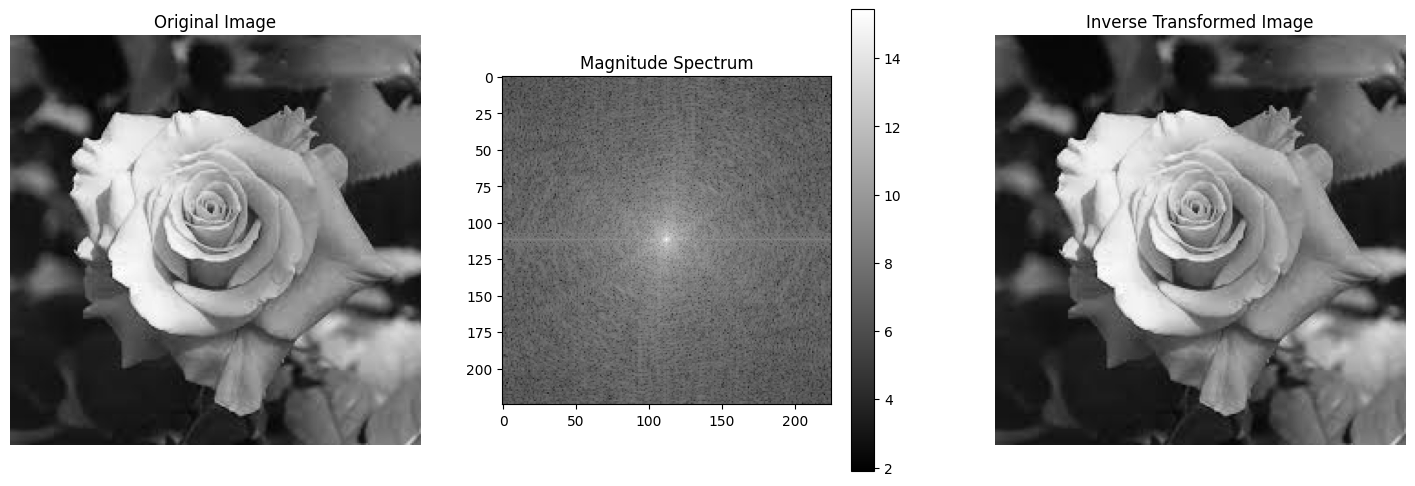

Pixel values of Original Image:
[[ 91  89  86 ... 126 125 127]
 [ 90  89  87 ... 129 128 132]
 [ 92  92  91 ... 133 132 130]
 ...
 [ 62  62  60 ...  92  92  98]
 [ 56  55  54 ...  90 105 106]
 [ 58  57  56 ... 104 106 108]]

Pixel values of Inverse Transformed Image:
[[ 90  88  85 ... 125 124 126]
 [ 89  88  86 ... 129 128 132]
 [ 91  91  90 ... 133 132 130]
 ...
 [ 60  60  58 ...  91  91  97]
 [ 54  53  52 ...  89 104 105]
 [ 56  55  54 ... 103 105 107]]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import numpy as np
from PIL import Image

def fourier_transform(image_path):
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)
    
    # Fourier Transform
    f_transform = np.fft.fft2(image_array)
    f_transform_shifted = np.fft.fftshift(f_transform)
    # magnitude spectrum
    magnitude_spectrum = np.abs(f_transform_shifted)
    # phase spectrum
    phase_spectrum = np.angle(f_transform_shifted)
    
    return magnitude_spectrum, phase_spectrum, image_array


def inverse_fourier_transform(magnitude_spectrum, phase_spectrum):
    f_transform_combined = magnitude_spectrum * np.exp(1j * phase_spectrum)
    # Inverse Fourier transform
    image_inverse_transform = np.fft.ifft2(np.fft.ifftshift(f_transform_combined)).real
    min_val = np.min(image_inverse_transform)
    max_val = np.max(image_inverse_transform)
    image_inverse_transform_normalized = (image_inverse_transform - min_val) / (max_val - min_val) * 255
    image_inverse_transform_normalized = image_inverse_transform_normalized.astype(np.uint8)
    return image_inverse_transform_normalized

def plot_spectrum(magnitude_spectrum, image_array, inverse_transform_image):
    # Plot the original image, magnitude spectrum, and reconstructed image side by side
    plt.figure(figsize=(18, 6))
    
    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Magnitude spectrum
    plt.subplot(1, 3, 2)
    plt.imshow(np.log1p(magnitude_spectrum), cmap='gray')
    plt.title('Magnitude Spectrum')
    plt.colorbar()
    
    # Inverse transformed image
    plt.subplot(1, 3, 3)
    plt.imshow(inverse_transform_image, cmap='gray')
    plt.title('Inverse Transformed Image')
    plt.axis('off')
    
    plt.show()
    # Print pixel values
    print("Pixel values of Original Image:")
    print(image_array)
    print("\nPixel values of Inverse Transformed Image:")
    print(inverse_transform_image)
    

image_path = '1-Rose.jpg'

magnitude_spectrum, phase_spectrum, image_array = fourier_transform(image_path)
inverse_transform_image = inverse_fourier_transform(magnitude_spectrum, phase_spectrum)
plot_spectrum(magnitude_spectrum, image_array, inverse_transform_image)


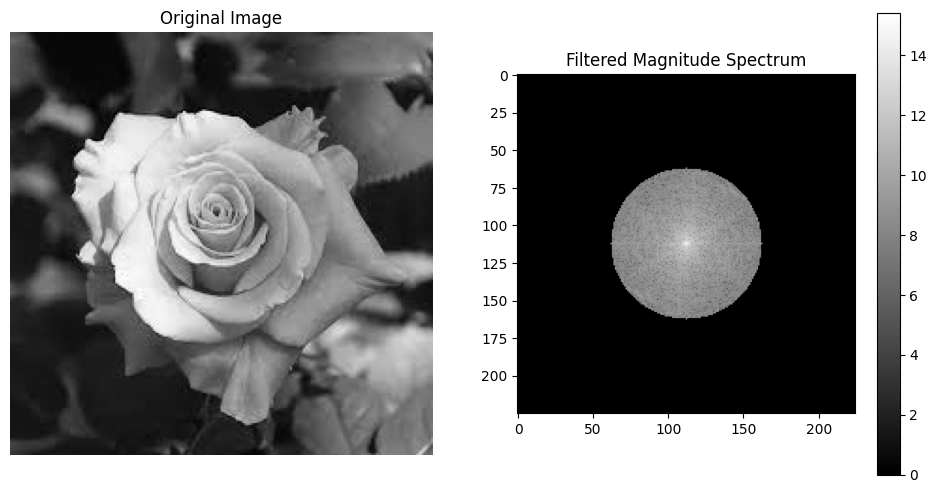

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def ideal_filter(magnitude_spectrum, radius):  # radius is the value you can change
    rows, cols = magnitude_spectrum.shape
    center_row, center_col = rows // 2, cols // 2
    x, y = np.meshgrid(np.arange(cols), np.arange(rows))
    # Calculate distances from the center
    distance = np.sqrt((x - center_col)**2 + (y - center_row)**2)
    # Create the ideal filter mask
    filter_mask = distance <= radius
    return filter_mask

def apply_filter(magnitude_spectrum, filter_mask):
    # Apply the filter to the magnitude spectrum
    filtered_magnitude_spectrum = magnitude_spectrum * filter_mask
    return filtered_magnitude_spectrum

def plot_images(image_array, magnitude_spectrum, filtered_magnitude_spectrum):
    plt.figure(figsize=(12, 6))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Magnitude spectrum with filter
    plt.subplot(1, 2, 2)
    plt.imshow(np.log1p(filtered_magnitude_spectrum), cmap='gray')
    plt.title('Filtered Magnitude Spectrum')
    plt.colorbar()
    
    plt.show()

def main(image_path, radius):  # radius is the value you can change
    # Open the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Perform the Fourier Transform
    f_transform = np.fft.fft2(image_array)
    # Shift the zero frequency component to the center
    f_transform_shifted = np.fft.fftshift(f_transform)
    # Calculate the magnitude spectrum
    magnitude_spectrum = np.abs(f_transform_shifted)
    
    # Create the ideal filter
    filter_mask = ideal_filter(magnitude_spectrum, radius)  # radius is the value you can change
    # Apply the filter to the magnitude spectrum
    filtered_magnitude_spectrum = apply_filter(magnitude_spectrum, filter_mask)
    
    # Plot the images
    plot_images(image_array, magnitude_spectrum, filtered_magnitude_spectrum)

# Path to the image file
image_path = '1-Rose.jpg'
# Radius for the ideal filter - Change this value to customize the filter
radius = 50

# Run the main function
main(image_path, radius)  # Change the radius value as needed
